### Dependence of the emittance growth rate (due to noise kicks) on the tune spread

- The emittance growth rate is obtained in the presence of amplitude and phase noise after tracking particles through 1 turn maps with PyHEADTAIL. 
- The objective is to study the dependence of the rate on the tune spread. Therefore, the simulation was repeated over a range of different detuning strengths in the vertical plane, αyy (as the noise kick is applied in the vertical plane).
- The simulation for each set of parameters is repeated 30 times (30 runs) and the emittance growth rate is obtained from the average of these runs (to reduce the uncertainty of the resutls). 
- As we want the results not to be affected by the randomness of the noise kick a fixed list of kicks is created (for 30 runs and 1e5 turns) which is used for every study over the range of ayy values.
- The emittance growth rates for the different ayy valyes are saved in pickle files in the end of the script so they can be used from emittance_growth_rate_vs_tune_spread_sets_0001.py script.

In [105]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

#### Plotting parameters

In [106]:
params = {'legend.fontsize': 20,
          'figure.figsize': (9.5, 8.5),
          'axes.labelsize': 27,
          'axes.titlesize': 23,
          'xtick.labelsize': 27,
          'ytick.labelsize': 27,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 5,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

#### 1) Load the data

    a) Define the parameters of the study

    b) Give the paths to the data folder

    c) Load the values of the transverse emittances in lists.

In [163]:
n_set = 4
n_runs = 20 # number of runs that the simulation was repeated
n_turns = int(1e5)            # number of cycles to run the simulation for
decTurns = int(100)           # how often to record data
circumference  = 6911.5623 # [m]
f_rev = 299792458/circumference  # [Hz] The revolution frequency of the machine 
# scan over the values of the detuning strength
a = np.linspace(-1e-17, -1e-11, 20)
b = np.linspace(-1e-12, 0, 10)
c = np.concatenate((a,b), axis=0)
ayy_scan = np.sort(c)[::-1]

In [164]:
path_to_data = '/afs/cern.ch/work/n/natriant/private/pyheadtail_example_crabcavity/'
type_of_noise = 'PN'
PN_name_template = '{}_mytest'.format(type_of_noise)

In [165]:
ex_dict = {}
ey_dict = {}

for ayy_index, ayy in enumerate(np.array(ayy_scan)*(-1)):
    print(ayy_index)
    ex_dict[ayy_index] = {}
    ey_dict[ayy_index] = {}
    for run in range(n_runs):
        temp_name = 'run{}'.format(run+1) # the suffix of the name of the current study
        # A. load the turn by turn data in a dictionary, try/except if one job is not yet completed
        try:
            meanX, meanY, meanXsq, meanYsq, emitX, emitY = np.loadtxt(path_to_data+PN_name_template+'{}_ayy{}_set{}/file.txt'.format(run+1, ayy_index, n_set), delimiter = ",", unpack = True)
        except (OSError):
            print('the job run {} and ayy {} is not completed and replaced'.format(run+1, ayy_index))
            meanX, meanY, meanXsq, meanYsq, emitX, emitY = np.loadtxt(path_to_data+PN_name_template+'{}_ayy{}_set{}/file.txt'.format(run, ayy_index, n_set), delimiter = ",", unpack = True)
        # B. Create a different list for each run and save the emittance values
        ex_dict[ayy_index][temp_name] = emitX 
        ey_dict[ayy_index][temp_name] = emitY

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


#### 2) Now the mean and the standard deviation of the emittance values are computed over all runs for each value of ayy. 

In [166]:
ex_mean = {}
ey_mean = {}
ex_std = {}
ey_std = {}

for ayy_index, ayy in enumerate(ayy_scan):
    ex_mean[ayy_index] = []
    ey_mean[ayy_index] = []
    ex_std[ayy_index] = []
    ey_std[ayy_index] = []

n_saved_turns = int(n_turns/decTurns)

for turn in range(n_saved_turns):
    ex_temp = []
    ey_temp = []

    for ayy_index, ayy in enumerate(ayy_scan):
        # keep all the emittance values for all the runs
        for run in range(n_runs):
            temp_name = 'run{}'.format(run+1)
            ex_temp.append(ex_dict[ayy_index][temp_name] [turn])
            ey_temp.append(ey_dict[ayy_index][temp_name] [turn])
        # calculate and append the mean of the emittance value for every turn
        ex_mean[ayy_index].append(np.mean(ex_temp))
        ey_mean[ayy_index].append(np.mean(ey_temp))
        # calculate and append the standard deviation of the emittance value for every turn
        ex_std[ayy_index].append(np.std(ex_temp))
        ey_std[ayy_index].append(np.std(ey_temp))    

#### 3) Convert turns to time [s]

In [167]:
separationTime = 1 / f_rev * decTurns #There are decTurns revolutions before each recording of data
tspan = (np.arange(n_turns / decTurns) + 1.0) * separationTime #total time spanned by the simulation

#### 4) Plot evolution of the H (horizontal emittance) emittance

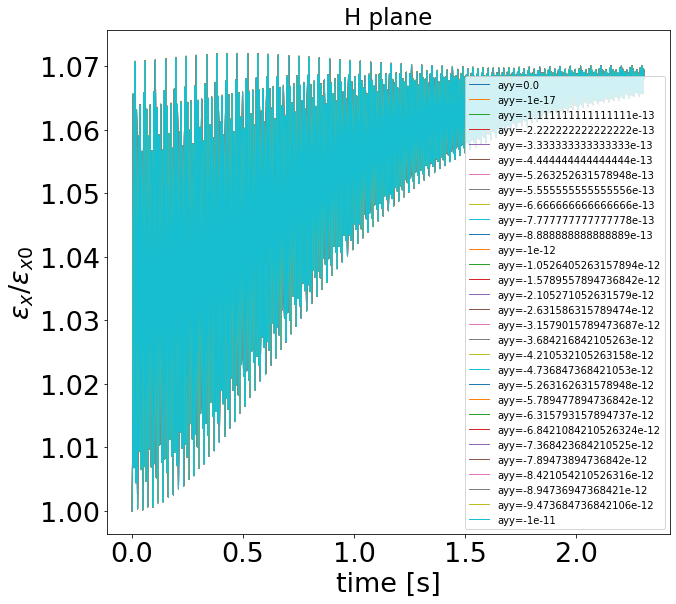

In [168]:
for ayy_index, ayy in enumerate(ayy_scan):
    plt.plot(tspan, ex_mean[ayy_index]/ex_mean[ayy_index][0], label = 'ayy={}'.format(ayy))     
    plt.xlabel('time [s]')
    plt.ylabel(r'$\epsilon_x / \epsilon_{x0}$')
    plt.title('H plane')
    plt.legend(fontsize=10)
    plt.grid()
    plt.tight_layout()
    savefig = True
    if savefig:
        plt.savefig('./figures/H_270GeV_SPS_noCC_{}1e-8_VRF2_37MV_1e5Nb_1e5turns_mean{}runs_set{}.png'.format(type_of_noise, n_runs, n_set))

#### 5) Plot evolution of the V (vertical emittance) emittance

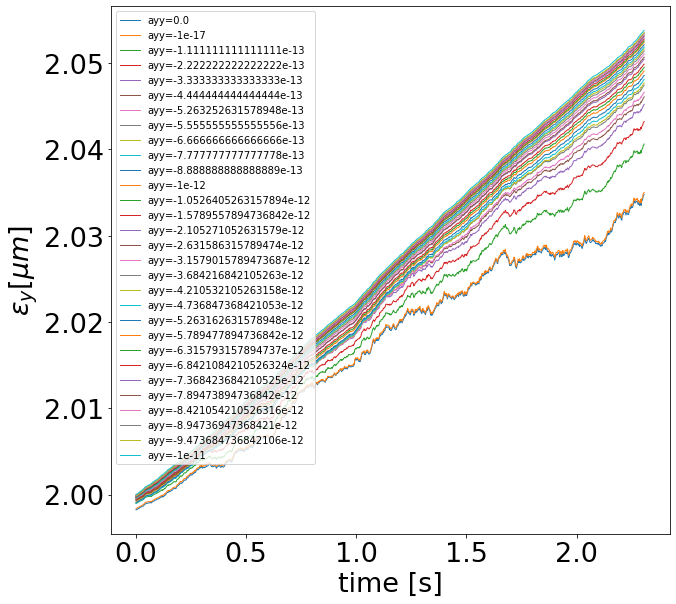

In [169]:
for ayy_index, ayy in enumerate(ayy_scan):
    plt.plot(tspan, np.array(ey_mean[ayy_index])*1e6, label='ayy={}'.format(ayy))   
    plt.xlabel('time [s]')
    plt.ylabel(r'$\epsilon_y [\mu m]$')
    plt.legend(loc=0, fontsize=10)
    plt.grid()
    plt.tight_layout()
    savefig = True
    if savefig:
        plt.savefig('./figures/V_emiitance_270GeV_SPS_noCC_{}1e-8_VRF2_37MV_1e5Nb_1e5turns_mean{}runs_set{}.png'.format(type_of_noise, n_runs, n_set))

#### 6) Plot evolution of the standard deviation $\sigma$ of the emittance values (in the vertical plane)

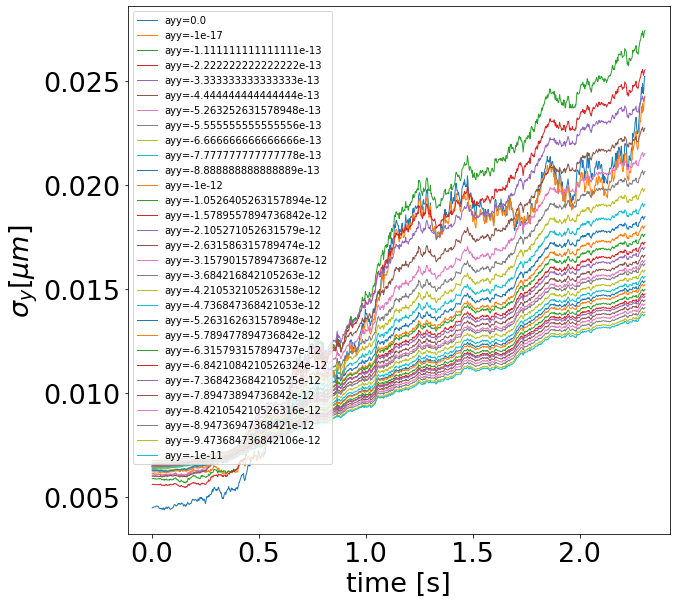

In [170]:
for ayy_index, ayy in enumerate(ayy_scan):
    plt.plot(tspan, np.array(ey_std[ayy_index])*1e6, label='ayy={}'.format(ayy))   
    plt.xlabel('time [s]')
    plt.ylabel(r'$\sigma_y [\mu m]$')
    plt.legend(loc=0, fontsize=10)
    plt.grid()
    plt.tight_layout()
    savefig = True
    if savefig:
        plt.savefig('./figures/V_std_270GeV_SPS_noCC_{}1e-8_VRF2_37MV_1e5Nb_1e5turns_mean{}runs_set{}.png'.format(type_of_noise, n_runs, n_set))

#### 7) Calculate the emittance growth rate via a linear fit
- Polynomial fit. The degree of the fitting polynomial is 1. 
- We focus our analysis only in the plane of the noise kick (here V plane)

In [171]:
my_rates = [] # type: list
my_residuals = []
my_error = []

for ayy_index, ayy in enumerate(ayy_scan):
    # linear fit
    [m_pn, b_pn], cov_pn = np.polyfit(tspan, ey_mean[ayy_index], 1, cov=True)
    # compute the error of the gradient of the fit slope
    err_pn = np.sqrt(np.diag(cov_pn))
    # append the results for each ayy value to a list
    my_rates.append(m_pn)
    my_residuals.append(b_pn)
    my_error.append(err_pn)

In the y the axis emittance values after substracting the initial emittance

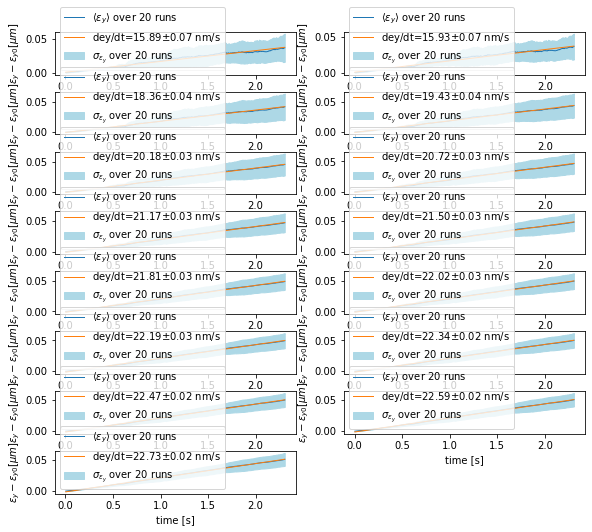

In [172]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.2)
for i in range(1, 16):
    ax = fig.add_subplot(8, 2, i)
    ax.fill_between(tspan, np.array(ey_mean[i-1]-ey_mean[i-1][0])*1e6 - np.array(ey_std[i-1]-ey_std[i-1][0])*1e6, np.array(ey_mean[i-1]-ey_mean[i-1][0])*1e6 + np.array(ey_std[i-1]-ey_std[i-1][0])*1e6, color='lightblue', label=r'$\sigma_{\epsilon_y} $'+' over {} runs'.format(n_runs))
    ax.plot(tspan, np.array(ey_mean[i-1]-ey_mean[i-1][0])*1e6, label=r'$\langle \epsilon_y \rangle $'+' over {} runs'.format(n_runs))
    ax.plot(tspan, (my_rates[i-1]*tspan + my_residuals[i-1]-ey_mean[i-1][0])*1e6, label='dey/dt={0:.2f}'.format(my_rates[i-1]*1e9)+'$\pm$'+'{0:.2f} nm/s'.format(my_error[i-1][0]*1e9))
    ax.tick_params('both', labelsize=10)
    ax.legend( prop={'size': 10})
    ax.set_xlabel('time [s]', fontsize=10)
    ax.set_ylabel(r'$\epsilon_y - \epsilon_{y0} [\mu m]$', fontsize=10)

#### 8) Plot the dependence of the emittance growth rate on the detuning strength αyy.

a) ayy in PyEHADTAIL units

ayy_pyheadtail = 2* p0 * ayy
, where p0 =βγ * mass * c
, where βγ the relativistic parameters, mass the proton mass in kgs and c the speed of light in m/s

b) in usual units (πm)^(-1)

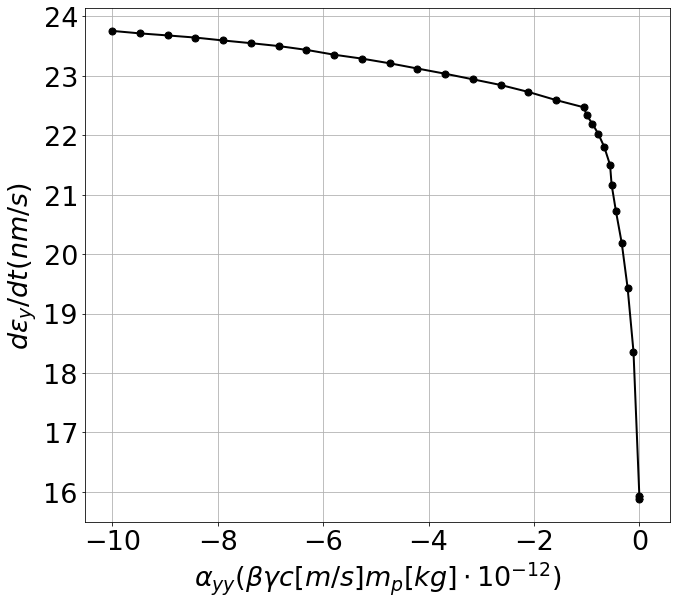

In [173]:
for ayy_index, ayy in enumerate(ayy_scan):
    plt.errorbar(ayy*1e12, np.array(my_rates[ayy_index])*1e9, xerr=np.array(my_error[ayy_index][0])*1e9, fmt='.', c='k', ms=14)
plt.plot(ayy_scan*1e12, np.array(my_rates)*1e9, linewidth=2, c='k')
plt.grid()
plt.xlabel(r'$\alpha_{yy} (\beta \gamma c [m/s] m_p [kg] \cdot 10^{-12}) $')
plt.ylabel(r'$d\epsilon_y / dt (nm/s) $')
plt.tight_layout()
savefig = True
if savefig:
    plt.savefig('./figures/emittance_grwoth_vs_ayy_pyheadtailunits_{}_set{}.png'.format(type_of_noise, n_set))

The plot below additionally shows:
1. The tune spread that exist in the nominal model of SPS in MAD-X (dipoles, quadrupoles and chromatic sextupoles)
2. The theoretically expected rate

In [174]:
# The ayy coefficient of the nominal SPS lattice in MAD-X
app_y = -30.78659311
p0 = 1.4431339682235239e-16 # reference momentum
app_y_pyheadtail = app_y*(p0*2) # convert to pyheadtail units
print(app_y_pyheadtail)

-8.88583565658346e-15


In [175]:
if type_of_noise == 'PN':
    my_color = 'C0'
    expected_growth = 24 # nm/s, expected rate from analytical calculations 
else:
    my_color = 'C1'
    expected_growth = 22 # nm/s, expected rate from analytical calculations 

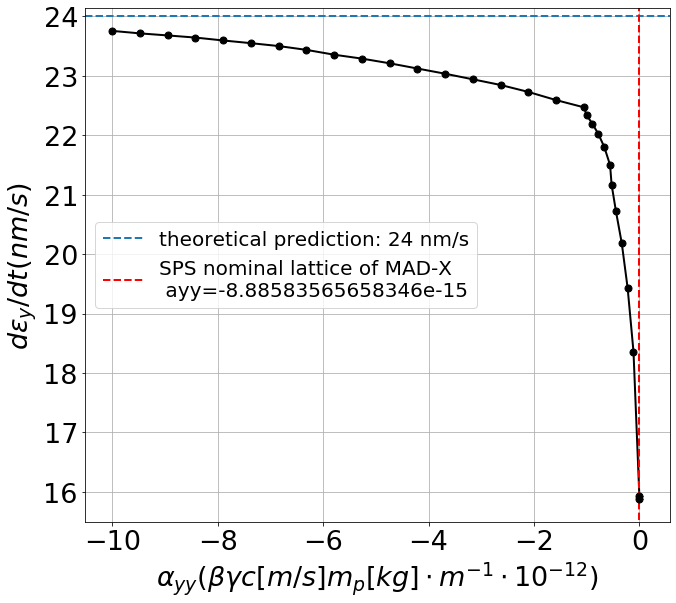

In [176]:
for ayy_index, ayy in enumerate(ayy_scan):
    plt.errorbar(ayy*1e12, np.array(my_rates[ayy_index])*1e9, xerr=np.array(my_error[ayy_index][0])*1e9, fmt='.', c='k', ms=14)
plt.plot(ayy_scan*1e12, np.array(my_rates)*1e9, linewidth=2, c='k')
#plt.plot(ayy_scan[0]*1e12, np.array(my_rates[0])*1e9,'.' ,c='k')
plt.axhline(y=expected_growth, c = my_color, linewidth = 2, linestyle='--', label= 'theoretical prediction: {} nm/s'.format(expected_growth))
plt.axvline(x=app_y_pyheadtail*1e12, ymin=0.003, c='r', linewidth=2, linestyle='--', label='SPS nominal lattice of MAD-X \n ayy={}'.format(app_y_pyheadtail))
plt.grid()
plt.xlabel(r'$\alpha_{yy} (\beta \gamma c [m/s] m_p [kg] \cdot m^{-1} \cdot 10^{-12}) $')
plt.ylabel(r'$d\epsilon_y / dt (nm/s) $')
plt.legend(loc=6)
plt.tight_layout()
savefig = True
if savefig:
    plt.savefig('./figures/emittance_grwoth_vs_ayy_pyheadtailunits_{}_v2_set{}.png'.format(type_of_noise, n_set))

#### b) Usual units of detuning strength (1/m)

In [177]:
p0 = 1.4431339682235239e-16 # reference momentum
ayy_scan_usual_units = ayy_scan/(p0*2)
print(ayy_scan_usual_units)

[ 0.00000000e+00 -3.46468180e-02 -3.84964645e+02 -7.69929290e+02
 -1.15489393e+03 -1.53985858e+03 -1.82354956e+03 -1.92482322e+03
 -2.30978787e+03 -2.69475251e+03 -3.07971716e+03 -3.46468180e+03
 -3.64706448e+03 -5.47057939e+03 -7.29409431e+03 -9.11760922e+03
 -1.09411241e+04 -1.27646391e+04 -1.45881540e+04 -1.64116689e+04
 -1.82351838e+04 -2.00586987e+04 -2.18822136e+04 -2.37057285e+04
 -2.55292435e+04 -2.73527584e+04 -2.91762733e+04 -3.09997882e+04
 -3.28233031e+04 -3.46468180e+04]


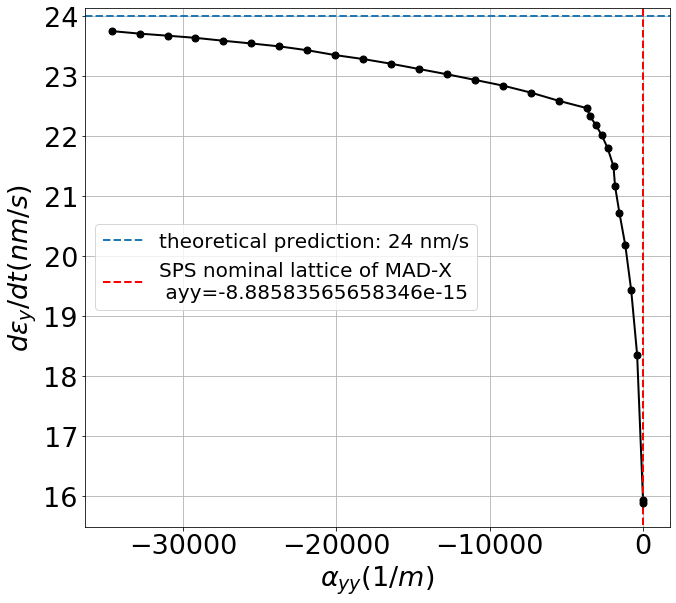

In [178]:
for ayy_index, ayy in enumerate(ayy_scan_usual_units):
    plt.errorbar(ayy, np.array(my_rates[ayy_index])*1e9, xerr=np.array(my_error[ayy_index][0])*1e9, fmt='.', c='k', ms=14)
plt.plot(ayy_scan_usual_units, np.array(my_rates)*1e9, linewidth=2, c='k')

plt.axhline(y=expected_growth, c = my_color, linewidth = 2, linestyle='--', label= 'theoretical prediction: {} nm/s'.format(expected_growth))
plt.axvline(x=app_y, ymin=0.003, c='r', linewidth=2, linestyle='--', label='SPS nominal lattice of MAD-X \n ayy={}'.format(app_y_pyheadtail))

plt.xlabel(r'$\alpha_{yy} (1/m) $')
plt.ylabel(r'$d\epsilon_y / dt (nm/s) $')

plt.legend(loc=6)
plt.grid()
plt.tight_layout()
savefig = True
if savefig:
    plt.savefig('./figures/emittance_grwoth_vs_ayy_usualunits_{}_set{}.png'.format(type_of_noise, n_set))

#### Save the growth rates in a pickle for future use

In [179]:
index_list = []
for ayy_index, ayy in enumerate(ayy_scan):
    index_list.append(ayy_index) 

In [180]:
save_pickle = True
growth_rates = {'index':index_list,'ayy (PyHEADTAIL units)':ayy_scan, 'ayy (1/m)':ayy_scan_usual_units, 'dey/dt (nm/s)':np.array(my_rates), 'fit error (nm/s)':np.array(my_error)} 
if save_pickle:
    pickle.dump(growth_rates, open('growth_rates_{}_set{}.pkl'.format(type_of_noise, n_set), 'wb'))